<a href="https://colab.research.google.com/github/EuderMelo/otimizadores/blob/main/Algoritmos_geneticos_UFJF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Otimização Meta-Heurística - Algoritmo Genético**



## **Introdução**

Primeiro é importante identificar os problemas nos quais não se utilizaria algoritmos genéticos ou outras técnicas de inteligência computacional:

**Primeiro Caso**:
* Otimização Linear
  * Continua
  * Inteira

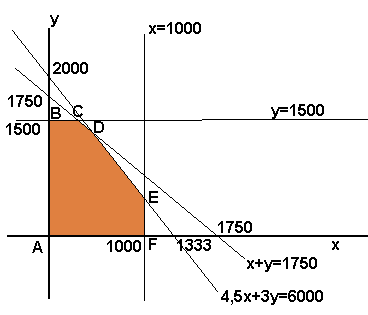




---

**Segundo Caso**:

* Otimização não linear
  * Continua
  * Inteira

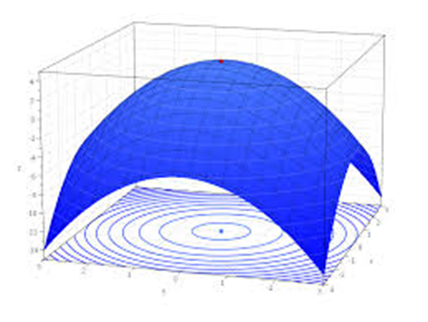
---

Em problemas lineares e não lineares convexos, inteiros ou contínuos existem métodos mais eficazes para encontrar o ótimo global.

* Algoritmo Simplex
* Branch and Bound
* Método de Newton
* Método do Gradiente Descendente
* Método dos Pontos Interiores
* Dentre Diversos Outros


##Problemas Multimodais

Nestes contextos, começa a ser mais interessante pensar em métodos baseados em inteligência computacional. Os algoritmos genéticos é um dos mais tradicionais.

Considere o seguinte problema de Otimização:

\begin{equation*}
\begin{aligned}
& \underset{x}{\text{Maximizar}}
& & 20*cos(5x) - x^2\\
\end{aligned}
\end{equation*}

A figura que representa essa função é dada por:

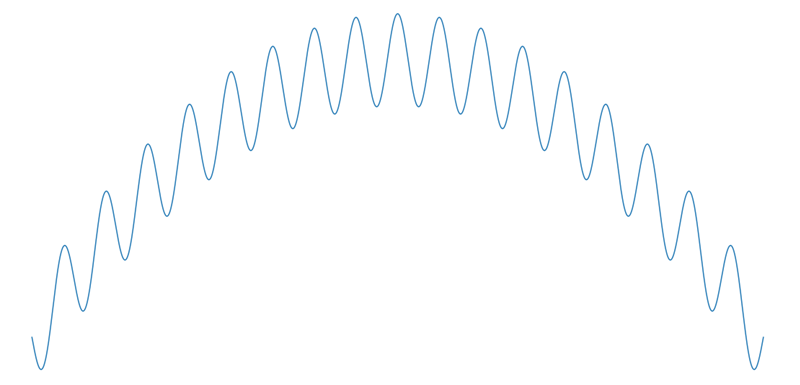

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Definindo o intervalo de x
x = np.linspace(-4*np.pi, 4*np.pi, 40000)

# Calculando a função
y = 20 * np.cos(5*x) - x**2

# Criando o gráfico
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='y = 20 * cos(5x) - x^2'))
fig.update_layout(title='Gráfico da função 20 * cos(5x) - x^2',
                  xaxis_title='x',
                  yaxis_title='y')
fig.show()

Apesar de ser visível que é um problema com vários mínimos e máximos locais, pela teoria descrita anteriormente a primeira coisa que precisamos é que:



1.   $f(x) = 0 $ seja contínua e diferenciável.
2.   Uma condição inicial $x^0$

Pelo método de Newton temos a seguinte resolução:

O minimize do Scipy é uma função que minimiza f(x). Mais informações: [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)



In [ ]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np

#Definindo a função objetivo.
def f(k):
    return -(20*np.cos(5*k) - k**2) # O problema é de maximização,
                                    # porém o otimizador foi desenvolvido para
                                    # resolver um problema de minimização,
                                    # por isso a adição do sinal negativo.

x0 = [0.1] #Valor do chute inicial.

res = minimize(f, x0, tol=1e-6)

print(f'Para o valor Inicial de {x0[0]:6.2f}.',
      f'O valor ótimo é {-res.fun:6.2f}, ',
      f'em x igual a {res.x[0]:6.2f}')


Para o valor Inicial de   0.10. O valor ótimo é  20.00,  em x igual a  -0.00


Vamos Inicializar com diversos valores iniciais e ver como será o resultado da otimização:




*   Os pontos em <font color='red'>**vermelho** </font> são as origens ($x^0$)

*   Os pontos em <font color='blue'>**azul** </font> são os finais da otimização


In [ ]:
from scipy.optimize import minimize
import plotly.graph_objects as go
import numpy as np

#Definindo a função objetivo.
def f(x):
    return -(20*np.cos(5*x) - x**2) # O problema é de maximização, porém o
                                    # otimizador necessita de um problema de
                                    # minimização, por isso a adição do sinal
                                    # negativo.

# Definindo o intervalo de x
xs = np.linspace(-4*np.pi, 4*np.pi, 40000)

# Calculando a função
ys = -f(xs)

# Criando o gráfico
fig = go.Figure()
fig.add_trace(go.Scatter(x=xs,
                         y=ys,
                         mode='lines',
                         line=dict(color='black', dash='dot', width=3),  # cor preta e linha pontilhada
                         name='f(x)'))

# Ajustando os limites dos eixos (equivalente ao plt.axis([...]) no Matplotlib)
fig.update_layout(
    xaxis=dict(range=[np.min(xs)-1, np.max(xs)+1]),
    yaxis=dict(range=[np.min(ys)-5, np.max(ys)+5]),
    title='Gráfico de f(x)',
    xaxis_title='x',
    yaxis_title='f(x)'
)

#Criação de 10 valores entre -10 e 10 para chute inicial
x0s = -4*np.pi + 2*4*np.pi * np.random.rand(10)

fig.add_trace(go.Scatter(
    x=x0s,
    y=-f(x0s),
    mode='markers',
    marker=dict(color='red', size=8),  # cor vermelha, marcadores maiores
    name='X0s'
))

# Cálculo do ótimo local para cada chute inicial
otimos_fun = list()
otimos_x = list()
for x0 in x0s:
  res = minimize(f, x0, tol=1e-6)
  otimos_x.append(res.x[0])
  otimos_fun.append(-res.fun)

fig.add_trace(go.Scatter(
    x=otimos_x,
    y=otimos_fun,
    mode='markers',
    marker=dict(color='blue', size=8),
    name='Ótimos Locais'
))

for i in range(10):
  fig.add_trace(go.Scatter(
          x=[otimos_x[i], x0s[i]],
          y=[otimos_fun[i], -f(x0s)[i]],
          mode='lines',
          line=dict(color='green', dash='solid'),
          showlegend=False))

fig.show()



Percebe-se que para esses problemas multimodais o valor inicial tem grande impacto da resolução do problema.

Uma solução é criar centenas ou milhares de pontos e utilizar o método não lineares para encontrar respostas. Porém quanto mais complexo o problema de otimização, maior a necessidade de "sorte" é necessário para encontrar a solução.

Um possível método de solução são as otimização metaheuristicas, se destacando o método de algoritmo Genético.



# Algoritmo Genético

A natureza conseguiu por milhões de anos descobrir métodos para solucionar seus problemas. Os mais comuns são problemas relacionados a sobrevivências tais como:



*   Conquista de alimento.
*   Propagação da Espécie.
*   Adaptação ao meio.

Por exemplo temos as formigas.

Formigas chegam ao seu alimento da maneira mais rápida e curta possível para evitar desperdicios.


Ao encontrar o alimento as formigas retornam ao formigueiro. Porém nesse processo elas liberam feromônios no solo.

Como os feromônios são dispersos pelo ar, pela chuva e por outras questões ambientais, quanto menor o caminho, mais formigas conseguem ir e voltar no mesmo tempo, reforçando a trilha em relação a mais longa. E cada vez mais formigas irão seguir essa trilha forte otimizando o processo de captura de comida
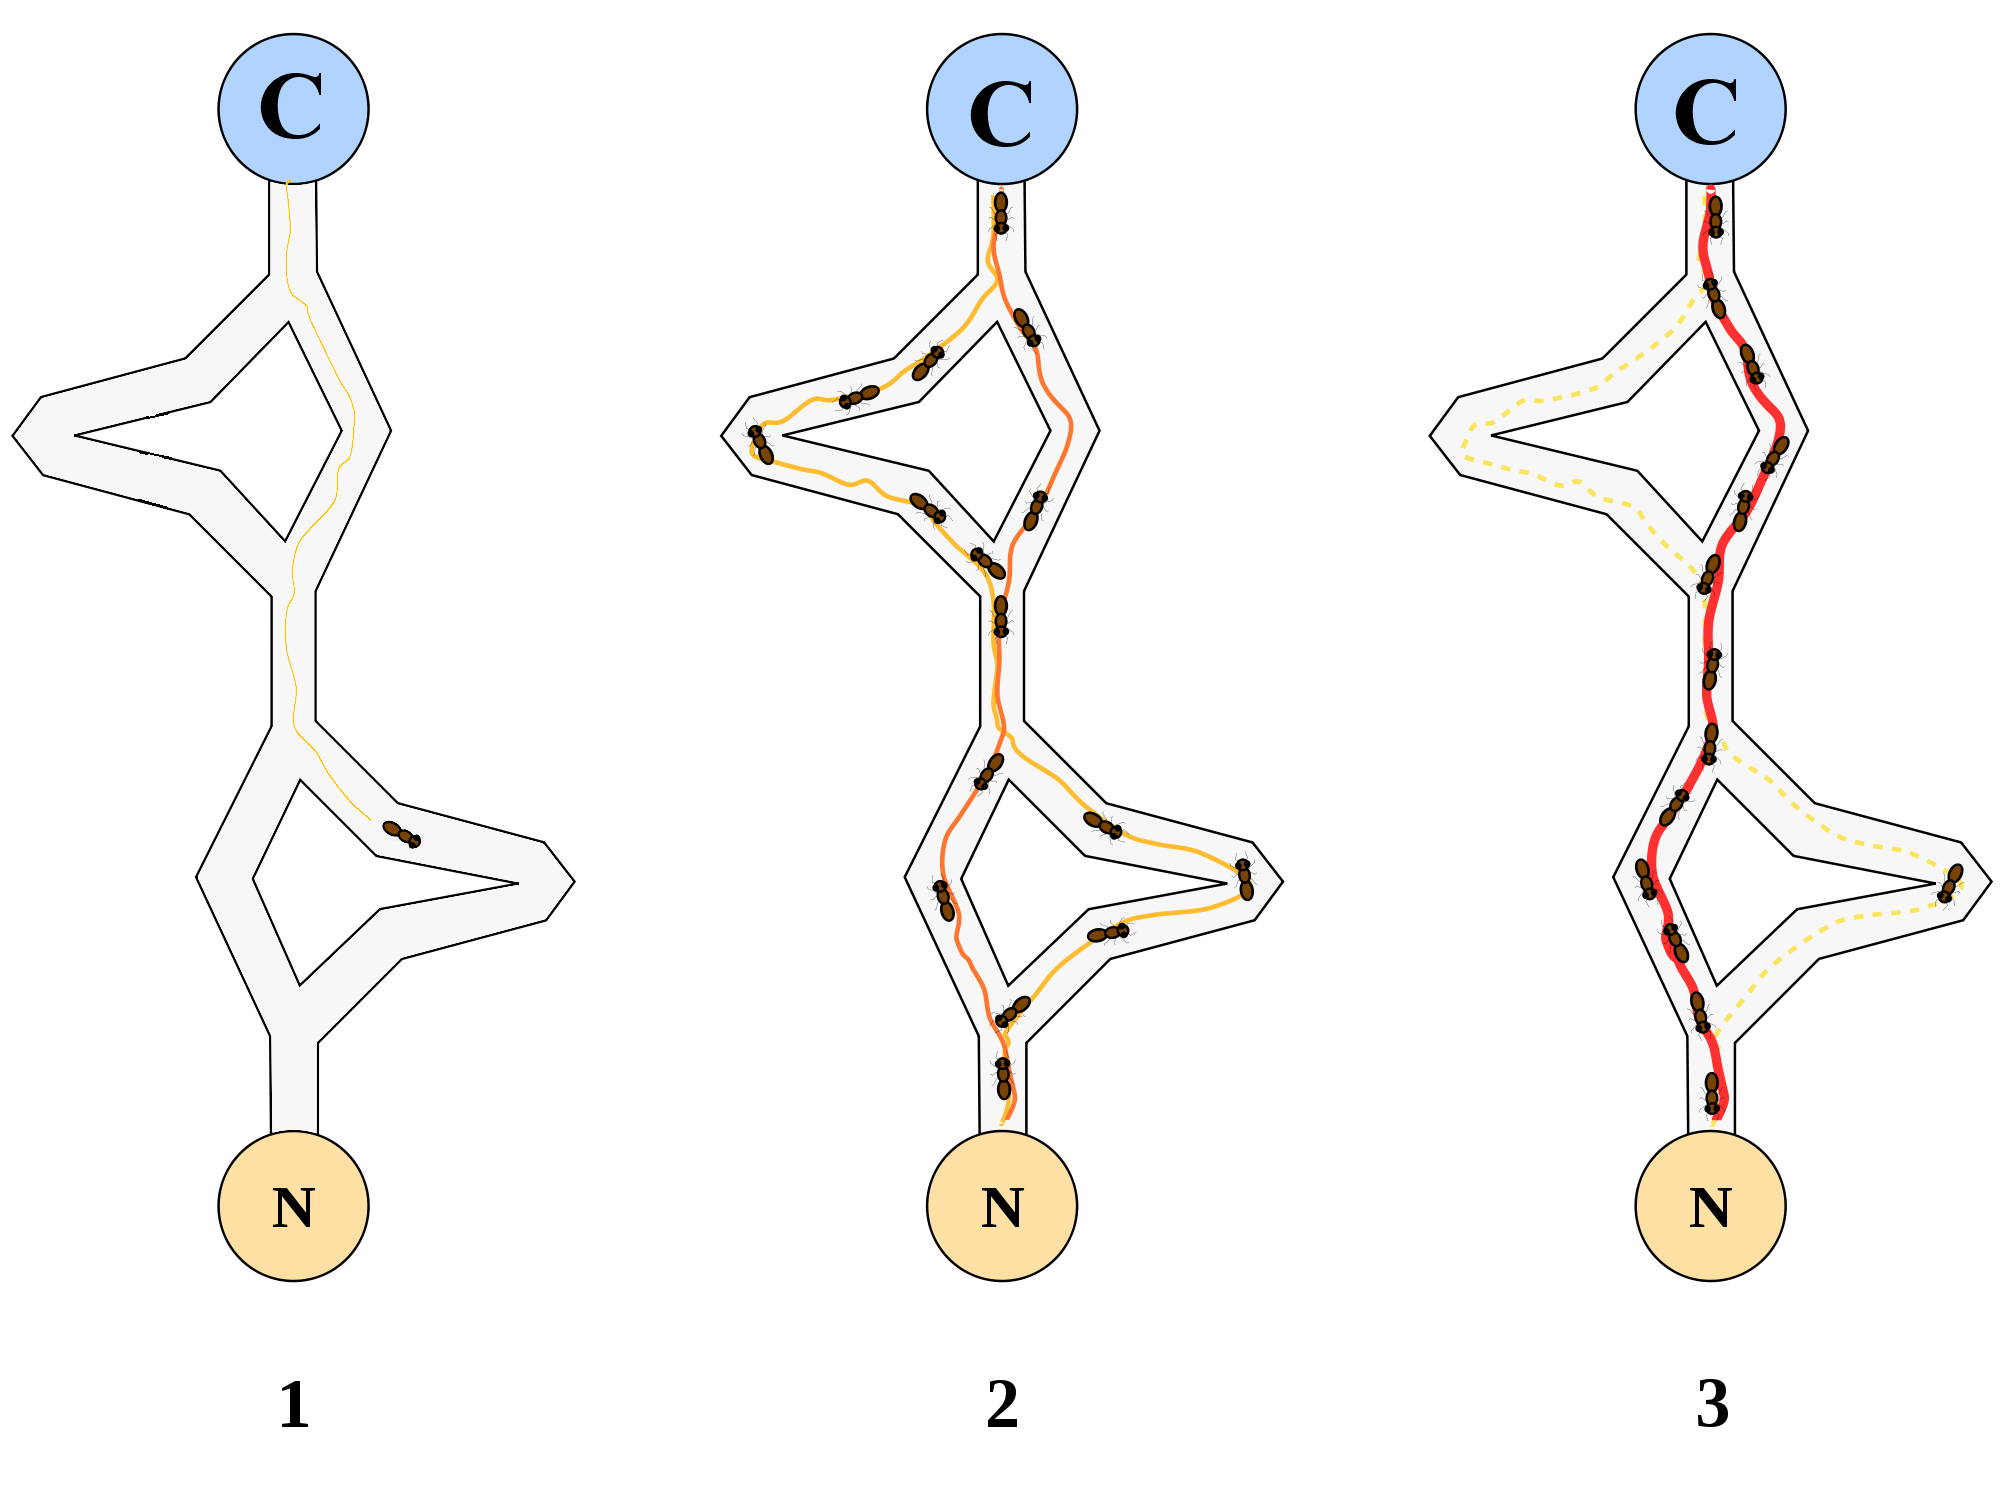

Na Universidade Federal de Juiz de Fora temos o GOHB - Grupo de Otimização Heurística e Bioinspirada

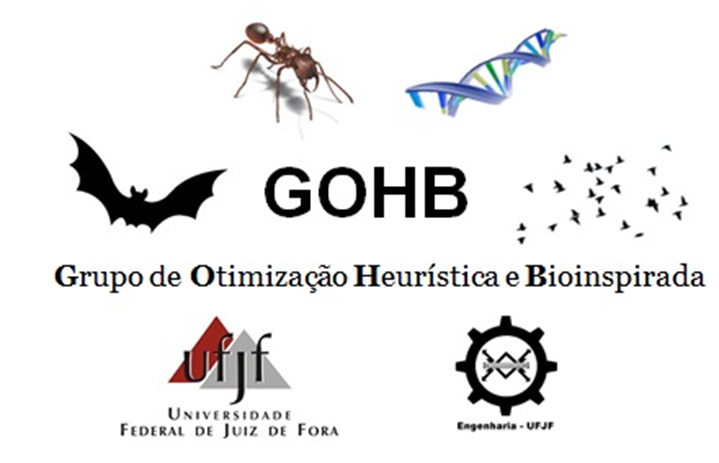

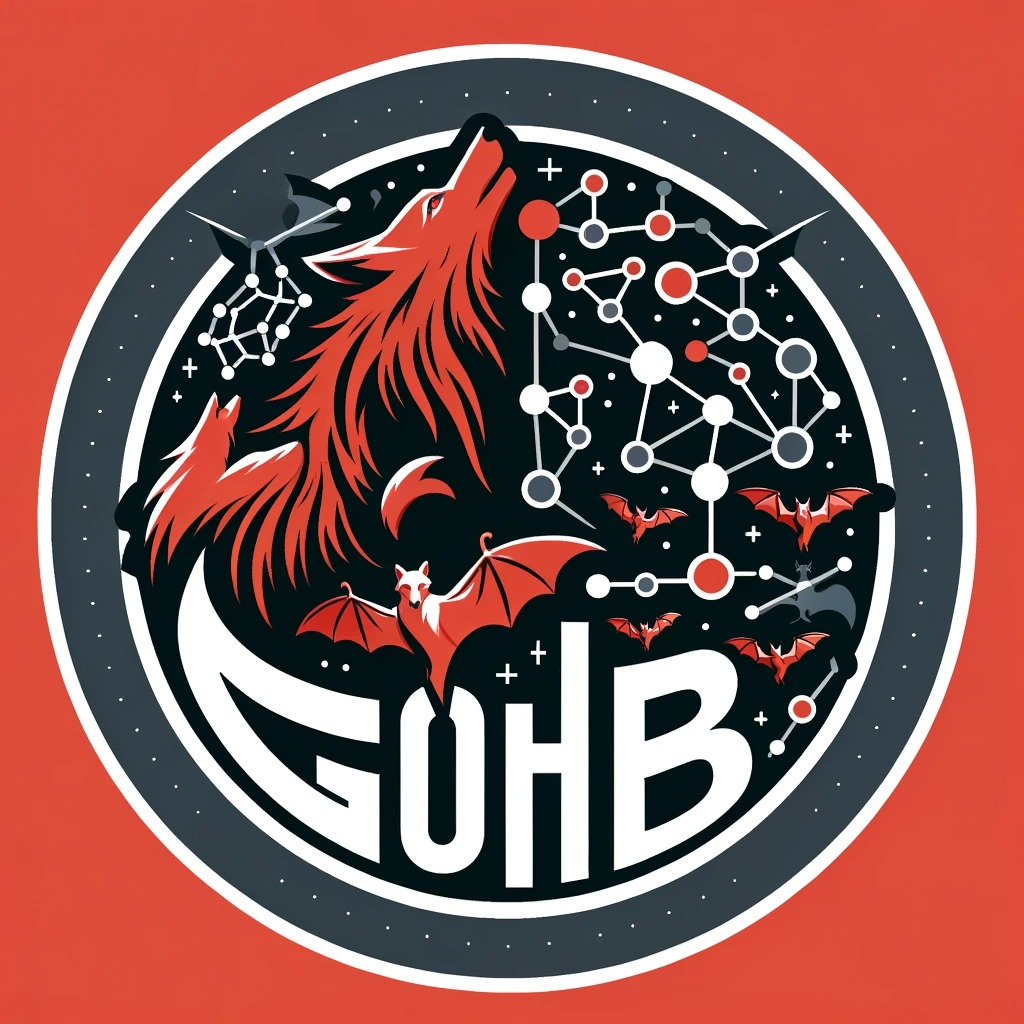

## Processo Teórico de Evolução



1.   Cria-se uma população de Indivíduos;
2.   Selecionar os mais aptos;
3.   Os mais aptos se reproduzem e criam filhos;
4.   Os filhos sofrem mutações;
5.   Retorna ao passo 2.

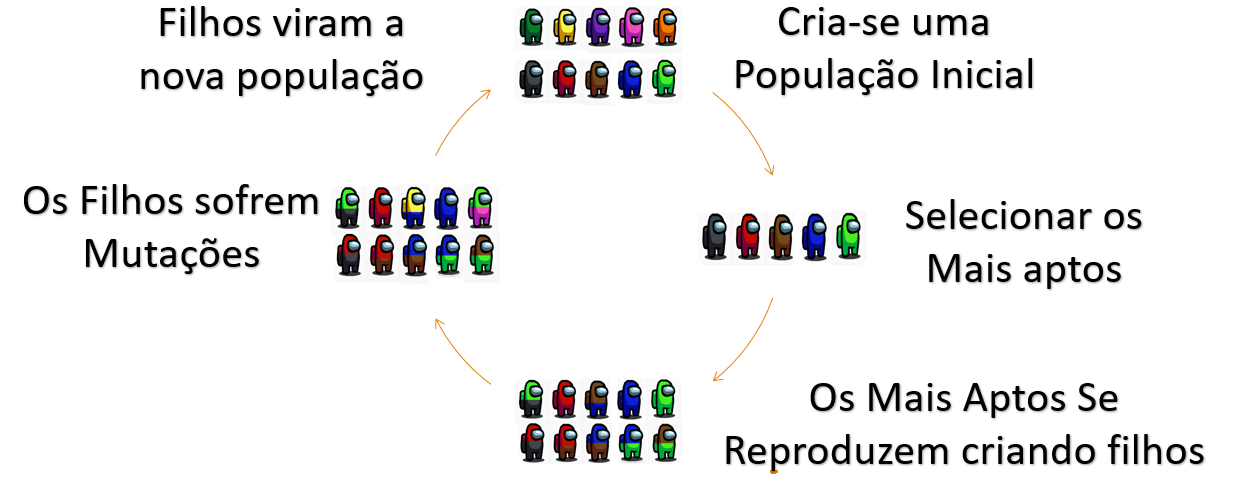



## **Agora como vamos resolver isso visando nosso problema multimodal**

## 1.   Criar População Inicial

O primeiro passo que temos que ter é criar nossa população inicial.

O que temos que prestar atenção?

1.   **Cada indivíduo é uma possível solução do nosso problema.**

No nosso caso temos um problema real univariável. Então cada individuo será representado por sua posição no eixo x.

Exemplo:

Individuo nº1: 3.43

Individuo nº2: -4.43

2.   **Quanto maior o número de indivíduos da população inicial, maior a chance de encontrar a resposta. Porém ao aumentar a população, o tempo de execução do algoritmo irá aumentar**

<font color='red'>**Variável a decidir = Tamanho da População** </font>

RECOMENDA-SE PARA ESTUDO UMA POPULAÇÃO INICIAL DE 10 A 20 INDIVIDUOS.


In [ ]:
#Criar população Inicial

Num_Individuos = 50
Taxa_Crossover = 0.50   # 50% dos mais aptos irão participar do cruzamento
Taxa_Mutacao = 0.10     # 10% dos indivíduos sofrerão algum tipo de mutação
Criterio_Parada = 50    # Após 50 gerações o algoritmo irá ser interrompido

Pop_inicial = -4*np.pi + 2*4*np.pi * np.random.rand(Num_Individuos)

print(Pop_inicial)

[  3.91530795   5.61828446  -9.37516846 -11.11899123  -3.66102234
   6.25845076 -11.29071876  12.2339242   -7.45980674  11.8121565
  -5.09024942   5.82535006   7.51998912  12.13985805  10.81893843
   7.15384488  -9.53819819   6.92438383  -2.71972938  11.77184883
  -2.71046798   3.37254357 -11.39633643   9.04843402  -1.4450827
   2.3374594   11.0575485  -11.37500624 -11.18884353 -10.70761044
  12.3120532  -10.89221387  -9.51721786  11.80256521  11.58183603
   5.15673511  -5.11620279   6.05997308   8.07486417  10.06369897
   7.18755402  -0.69973053  -7.57060738  -4.07834872  -0.41318366
  -1.38397164  12.02773569   4.66205515  -9.4199883   -0.18201564]


In [ ]:
from os import PRIO_PGRP
from scipy.optimize import minimize
import plotly.graph_objects as go
import numpy as np
import random

#Definindo a função objetivo.
def fitness_function(x):
    return (20*np.cos(5*x) - x**2) # O problema é de maximização, porém o
                                    # otimizador necessita de um problema de
                                    # minimização, por isso a adição do sinal
                                    # negativo.

def seleciona(x):  # Seleciona os melhores indivíduos:

  # 1. Ordena os valores e retorna os índices
  indices_ordenados = np.argsort(fitness_function(x))

  # 2. Pega os índices dos maiores valores
  melhores = (int)(Num_Individuos*Taxa_Crossover)
  indices_maiores = indices_ordenados[-melhores:]

  return x[indices_maiores], fitness_function(x[indices_maiores])

def crossover(x):
  new = list()
  new.append(x[-1])
  for i in range(Num_Individuos-1):
    pai = random.choice(x)
    mae = random.choice(x)
    alpha = np.random.rand(1)
    filho = alpha[0]*pai + (1-alpha[0])*mae
    new.append(filho)

  return(np.array(new))

def mutation(x):
  new = list()

  Flag = True
  for individuo in x:
    if Flag:
      new.append(individuo)
      Flag = False
    else:
      if np.random.rand(1)[0] < Taxa_Mutacao:
        new.append(individuo + np.random.randn(1)[0])
      else:
        new.append(individuo)
  return np.array(new)

# Calculando a função
xs = np.linspace(-4*np.pi, 4*np.pi, 40000)
ys = fitness_function(xs)

fig = list()
for geracao in range(Criterio_Parada):
  # Criando o gráfico
  fig.append(go.Figure())
  fig[-1].add_trace(go.Scatter(x=xs,
                          y=ys,
                          mode='lines',
                          line=dict(color='black', dash='dot', width=3),  # cor preta e linha pontilhada
                          name='f(x)'))

  fig[-1].add_trace(go.Scatter(
      x=Pop_inicial,
      y=fitness_function(Pop_inicial),
      mode='markers',
      marker=dict(color='red', size=8),  # cor vermelha, marcadores maiores
      name='X0s'
  ))

  x_melhores, y_melhores = seleciona(Pop_inicial)

  fig[-1].add_trace(go.Scatter(
      x=x_melhores,
      y=y_melhores,
      mode='markers',
      marker=dict(
          symbol='circle-open',  # círculo vazio
          size=12,
          color='green'),
      name='Mais Aptos'
  ))

  nova_populacao = crossover(x_melhores)
  nova_populacao = mutation(nova_populacao)

  fig[-1].add_trace(go.Scatter(
      x=nova_populacao,
      y=fitness_function(nova_populacao),
      mode='markers',
      marker=dict(  # círculo vazio
          size=10,
          color='purple'),
      name='Nova Populacao'
  ))

  fig[-1].update_layout(
      xaxis=dict(range=[np.min(xs)-1, np.max(xs)+1]),
      yaxis=dict(range=[np.min(ys)-5, np.max(ys)+5]),
      title='Gráfico de f(x) - Iteraçao:' + str(geracao),
      xaxis_title='x',
      yaxis_title='f(x)')

  #fig[-1].show()

  Pop_inicial = nova_populacao

fig[-1].show()

In [ ]:
!pip install -U kaleido

In [ ]:
import plotly.graph_objects as go
import imageio
import os

# Criar uma pasta temporária para as imagens
os.makedirs("frames", exist_ok=True)

# Salvar cada figura como PNG
for i, frame in enumerate(fig):
    frame.write_image(f"frames/frame_{i:03d}.png")

# Criar o GIF a partir das imagens
imagens = [imageio.v2.imread(f"frames/frame_{i:03d}.png") for i in range(Criterio_Parada)]
imageio.mimsave("animacao.gif", imagens, duration=0.2)  # duration em segundos por frame